In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:

import numpy as np

def read_images(path):
    with open(path, "rb") as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

X_train = read_images("Dataset/fashion-mnist/train-images-idx3-ubyte/train-images-idx3-ubyte")
X_test  = read_images("Dataset/fashion-mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte")


In [14]:
def read_labels(path):
    with open(path, "rb") as f:
        return np.frombuffer(f.read(), dtype=np.uint8, offset=8)

y_train = read_labels("Dataset/fashion-mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte")
y_test  = read_labels("Dataset/fashion-mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte")


In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

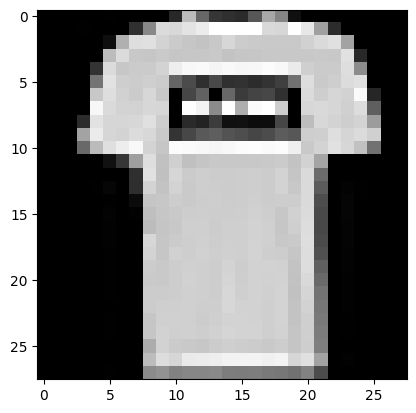

In [18]:
plt.imshow(X_train[1,:],cmap="gray")

In [19]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg')


In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │         7,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,496 (353.50 KB)

 Trainable params: 88,578 (346.01 KB)

 Non-trainable params: 1,918 (7.49 KB)

## Power lr

In [22]:
sgd = keras.optimizers.SGD(decay=1e-3)

c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

In [25]:
history_power = model.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7657 - loss: 0.6859 - val_accuracy: 0.8209 - val_loss: 0.5024
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8254 - loss: 0.5002 - val_accuracy: 0.8381 - val_loss: 0.4527
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8385 - loss: 0.4572 - val_accuracy: 0.8488 - val_loss: 0.4237
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8468 - loss: 0.4299 - val_accuracy: 0.8544 - val_loss: 0.4057
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8532 - loss: 0.4127 - val_accuracy: 0.8568 - val_loss: 0.4003
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8588 - loss: 0.3942 - val_accuracy: 0.8592 - val_loss: 0.3921
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8625 - loss: 0.3850 - val_accuracy: 0.8643 - val_loss: 0.3829
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8656 - loss: 0.3743 - 

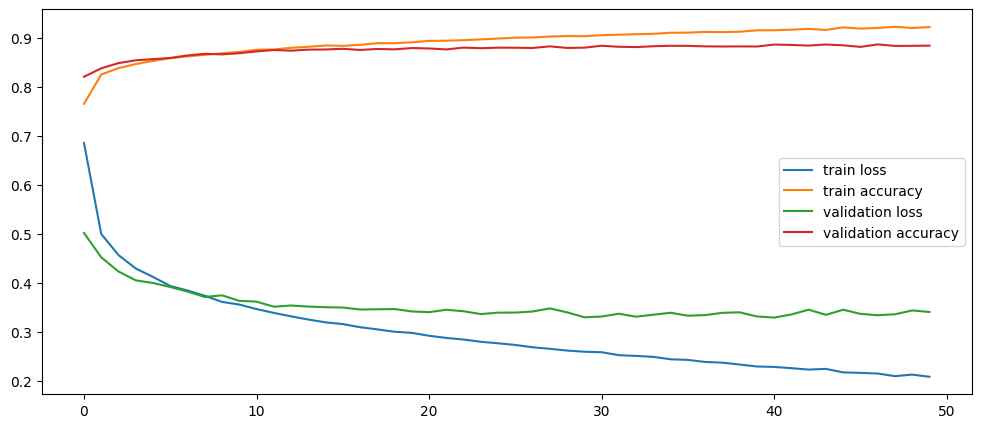

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(history_power.history["loss"], label="train loss")
ax.plot(history_power.history["accuracy"], label="train accuracy")
ax.plot(history_power.history["val_loss"], label="validation loss")
ax.plot(history_power.history["val_accuracy"], label="validation accuracy")
ax.legend()

<hr>

## Exp lr

In [29]:
def exp_lr_func(eta0, s):
  def exp_lr(epoch):
    return eta0*0.1**(epoch/s)
  return exp_lr
exp_lr_s = exp_lr_func(0.01, 10)  

In [30]:
exp_lr_c = keras.callbacks.LearningRateScheduler(exp_lr_s)

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [34]:
history_exp = model.fit(X_train, y_train, epochs=50,
                    validation_split=0.15,
                    callbacks=[exp_lr_c])

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7685 - loss: 0.6871 - val_accuracy: 0.8224 - val_loss: 0.4941 - learning_rate: 0.0100
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8259 - loss: 0.5013 - val_accuracy: 0.8398 - val_loss: 0.4485 - learning_rate: 0.0079
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8365 - loss: 0.4650 - val_accuracy: 0.8483 - val_loss: 0.4321 - learning_rate: 0.0063
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8420 - loss: 0.4479 - val_accuracy: 0.8526 - val_loss: 0.4197 - learning_rate: 0.0050
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8472 - loss: 0.4314 - val_accuracy: 0.8534 - val_loss: 0.4123 - learning_rate: 0.0040
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8517 - loss: 0.4220 - val_accuracy: 0.8571 - val_loss: 0.4069 - learning_rate: 0.0032
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8542 - l

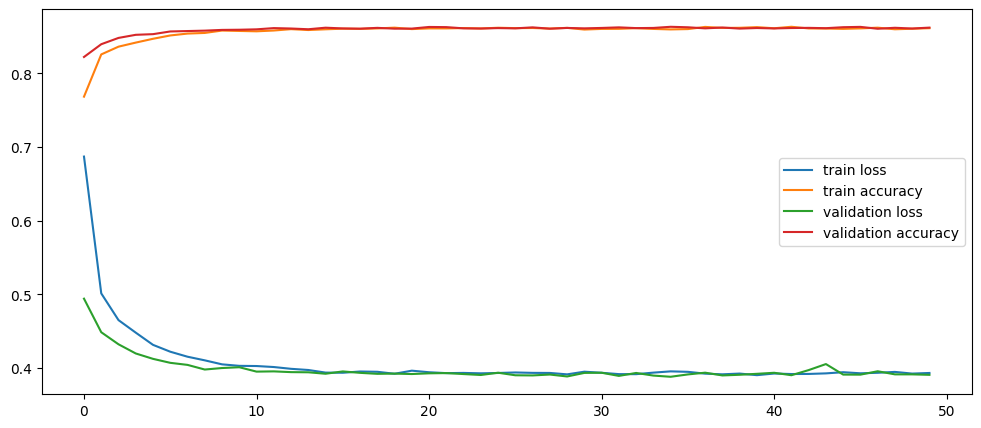

In [35]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_exp.history["loss"], label="train loss")
ax.plot(history_exp.history["accuracy"], label="train accuracy")
ax.plot(history_exp.history["val_loss"], label="validation loss")
ax.plot(history_exp.history["val_accuracy"], label="validation accuracy")
ax.legend()

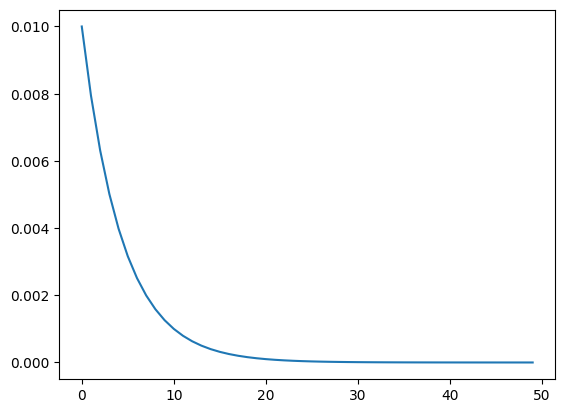

In [38]:
plt.plot(history_exp.epoch, history_exp.history["learning_rate"])

## Piecewise lr

In [39]:
def pw_lr(epoch):
  if epoch < 10:
    return 0.01
  elif epoch < 20:
    return 0.005
  elif epoch < 40:
    return 0.001
  else:
    return 0.0001

In [40]:
pw_lr_c = keras.callbacks.LearningRateScheduler(pw_lr)

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [44]:
history_pw = model.fit(X_train, y_train, epochs=50,
                    validation_split=0.15,
                    callbacks=[pw_lr_c])

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7677 - loss: 0.6871 - val_accuracy: 0.8274 - val_loss: 0.4937 - learning_rate: 0.0100
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8259 - loss: 0.4937 - val_accuracy: 0.8388 - val_loss: 0.4539 - learning_rate: 0.0100
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8411 - loss: 0.4529 - val_accuracy: 0.8501 - val_loss: 0.4197 - learning_rate: 0.0100
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8475 - loss: 0.4308 - val_accuracy: 0.8557 - val_loss: 0.4045 - learning_rate: 0.0100
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8547 - loss: 0.4121 - val_accuracy: 0.8627 - val_loss: 0.3976 - learning_rate: 0.0100
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8575 - loss: 0.3966 - val_accuracy: 0.8641 - val_loss: 0.3831 - learning_rate: 0.0100
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8609 - l

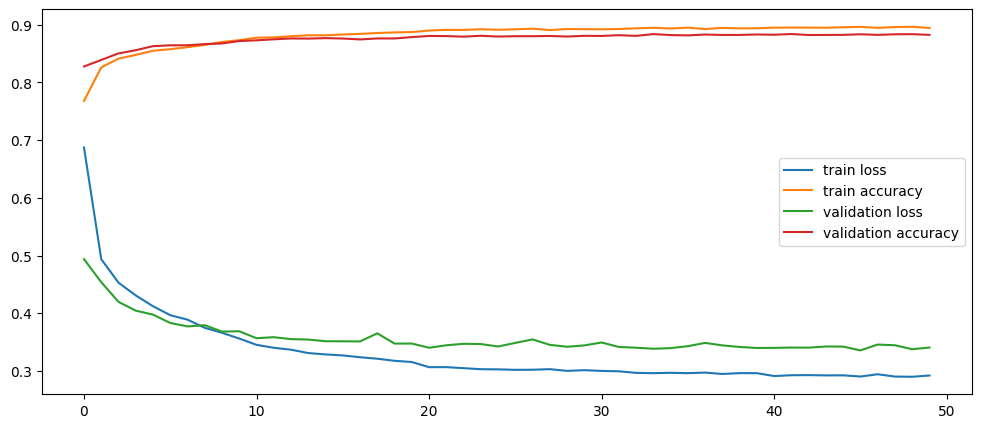

In [45]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_pw.history["loss"], label="train loss")
ax.plot(history_pw.history["accuracy"], label="train accuracy")
ax.plot(history_pw.history["val_loss"], label="validation loss")
ax.plot(history_pw.history["val_accuracy"], label="validation accuracy")
ax.legend()

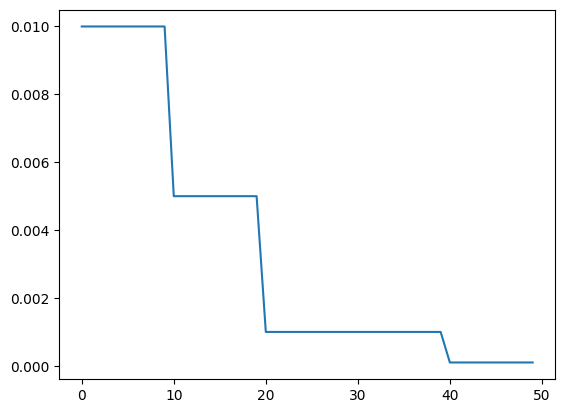

In [47]:
plt.plot(history_pw.epoch, history_pw.history["learning_rate"])

<hr>

## Performance

In [48]:
per_lr_c = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10)

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [51]:
history_per = model.fit(X_train, y_train, epochs=50,
                    validation_split=0.15,
                    callbacks=[per_lr_c])

Epoch 1/50


1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7662 - loss: 0.6905 - val_accuracy: 0.8212 - val_loss: 0.4953 - learning_rate: 0.0100
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8271 - loss: 0.4972 - val_accuracy: 0.8421 - val_loss: 0.4440 - learning_rate: 0.0100
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8405 - loss: 0.4547 - val_accuracy: 0.8473 - val_loss: 0.4232 - learning_rate: 0.0100
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8476 - loss: 0.4301 - val_accuracy: 0.8499 - val_loss: 0.4245 - learning_rate: 0.0100
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8539 - loss: 0.4116 - val_accuracy: 0.8568 - val_loss: 0.4022 - learning_rate: 0.0100
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8573 - loss: 0.3994 - val_accuracy: 0.8601 - val_loss: 0.3949 - learning_rate: 0.0100
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8635 - loss: 0.3831

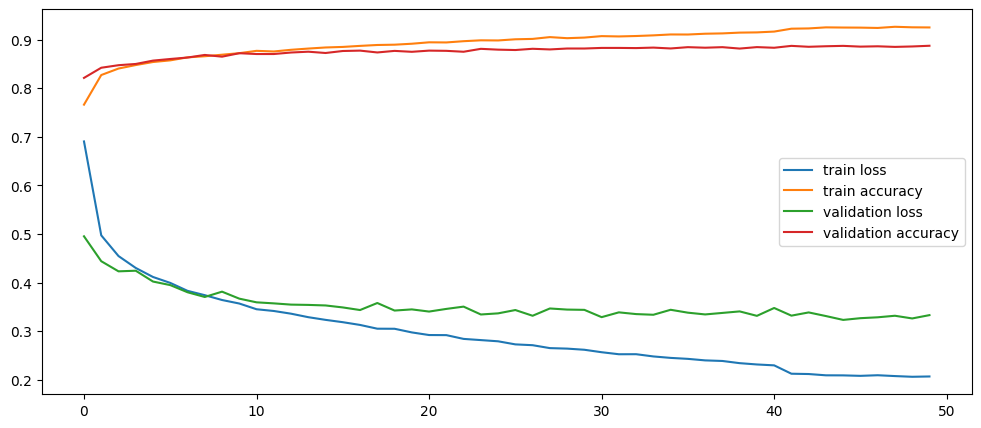

In [52]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_per.history["loss"], label="train loss")
ax.plot(history_per.history["accuracy"], label="train accuracy")
ax.plot(history_per.history["val_loss"], label="validation loss")
ax.plot(history_per.history["val_accuracy"], label="validation accuracy")
ax.legend()

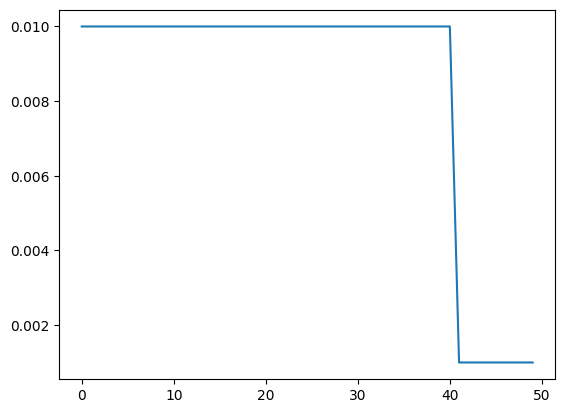

In [54]:
plt.plot(history_per.epoch, history_per.history["learning_rate"])

In [55]:
min(history_per.history["val_loss"])

0.3232567012310028

<hr>

## 1cycle lr

In [67]:
class Exp_lr(keras.callbacks.Callback):
    def __init__(self, factor):
        super().__init__()
        self.factor = factor
        self.lr = []
        self.loss = []

    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        current_loss = logs.get("loss")

        # گرفتن مقدار فعلی lr
        current_lr = float(self.model.optimizer.learning_rate)

        self.lr.append(current_lr)
        self.loss.append(current_loss)

        # آپدیت lr
        new_lr = current_lr * self.factor
        self.model.optimizer.learning_rate = new_lr


In [68]:
def search_lr_loss(model, X, y, epochs=1, batch_size=32,
                   min_lr=1e-6, max_lr=10):

    model_weights = model.get_weights()

    iterations = int(X.shape[0] / batch_size) * epochs
    factor = np.exp(np.log(max_lr / min_lr) / iterations)

    # ذخیره lr اولیه
    initial_lr = model.optimizer.learning_rate

    # ست کردن lr جدید
    model.optimizer.learning_rate = min_lr

    epx_lr = Exp_lr(factor)

    history = model.fit(
        X, y,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[epx_lr],
        verbose=0
    )

    # برگردوندن lr اولیه
    model.optimizer.learning_rate = initial_lr

    # برگردوندن وزن‌ها
    model.set_weights(model_weights)

    return epx_lr.lr, epx_lr.loss


In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [70]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [71]:
lr, loss = search_lr_loss(model, X_train, y_train)

(0.0, 5.0)

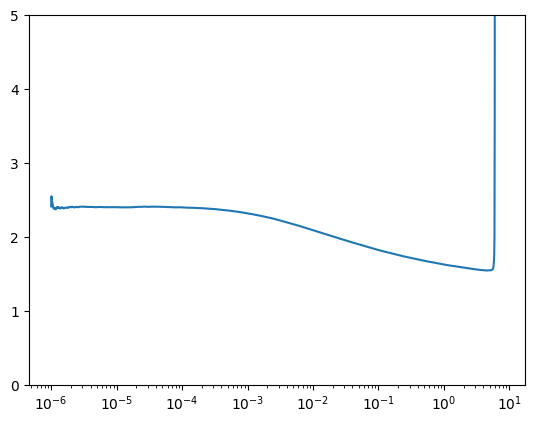

In [72]:
plt.plot(lr, loss)
plt.xscale("log")
plt.ylim(0, 5)

In [79]:
class One_cycle_lr(keras.callbacks.Callback):
    def __init__(self, iterations, max_lr, init_lr=None,
                 final_steps=None, final_lr=None):

        super().__init__()

        self.iterations = iterations
        self.max_lr = max_lr
        self.init_lr = init_lr or max_lr / 10
        self.final_steps = final_steps or int(iterations / 10) + 1
        self.half_iterations = int((iterations - self.final_steps) / 2)
        self.final_lr = final_lr or self.init_lr / 1000
        self.iteration = 0

    def interpolation(self, y2, y1, x2, x1):
        return (y2 - y1) / (x2 - x1) * (self.iteration - x1) + y1

    def on_batch_begin(self, batch, logs=None):

        if self.iteration < self.half_iterations:
            lr = self.interpolation(
                self.max_lr, self.init_lr,
                self.half_iterations, 0
            )

        elif self.iteration < 2 * self.half_iterations:
            lr = self.interpolation(
                self.init_lr, self.max_lr,
                2 * self.half_iterations, self.half_iterations
            )

        else:
            lr = self.interpolation(
                self.final_lr, self.init_lr,
                self.iterations, 2 * self.half_iterations
            )

        self.iteration += 1

        self.model.optimizer.learning_rate = float(lr)


In [80]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [81]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [82]:
epochs = 50
batch_size = 32
iters = int(X_train.shape[0]/batch_size)*epochs
one_cycle_lr = One_cycle_lr(iters, max_lr=0.03)
history_onecycle = model.fit(X_train, y_train,
                             validation_split=0.15,
                             epochs=epochs,
                             callbacks=[one_cycle_lr])

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7078 - loss: 0.8994 - val_accuracy: 0.7966 - val_loss: 0.6077
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7990 - loss: 0.5934 - val_accuracy: 0.8190 - val_loss: 0.5104
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8205 - loss: 0.5197 - val_accuracy: 0.8342 - val_loss: 0.4631
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8327 - loss: 0.4804 - val_accuracy: 0.8417 - val_loss: 0.4419
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8432 - loss: 0.4490 - val_accuracy: 0.8481 - val_loss: 0.4224
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8475 - loss: 0.4314 - val_accuracy: 0.8548 - val_loss: 0.4108
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8537 - loss: 0.4162 - val_accuracy: 0.8567 - val_loss: 0.3981
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8581 - loss: 0.4023 - 

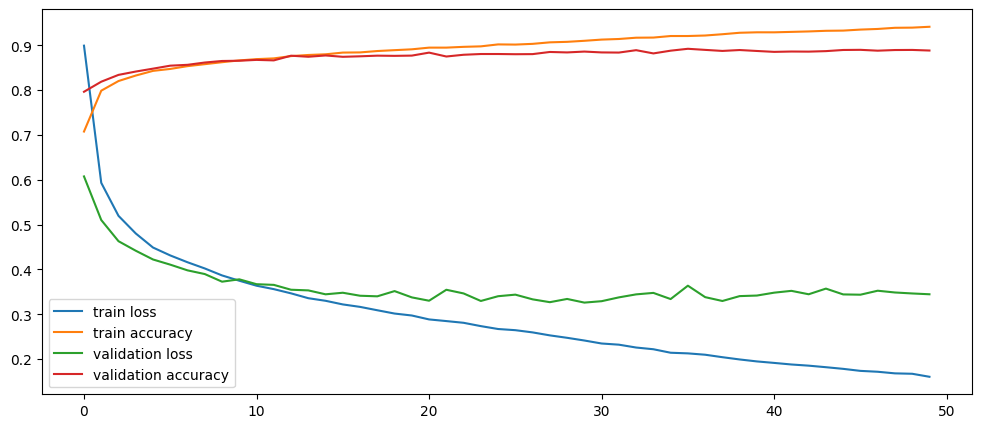

In [83]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_onecycle.history["loss"], label="train loss")
ax.plot(history_onecycle.history["accuracy"], label="train accuracy")
ax.plot(history_onecycle.history["val_loss"], label="validation loss")
ax.plot(history_onecycle.history["val_accuracy"], label="validation accuracy")
ax.legend()